제목 - 가수                                                                         			TOP10횟수회
Ditto - NewJeans                                                                			25회
Hype Boy - NewJeans                                                             			25회
Candy - NCT DREAM                                                               			8회
NOT SORRY (Feat. pH-1) (Prod. by Slom) - 이영지                                    			4회
사건의 지평선 - 윤하(Younha/ユンナ)                                                        			14회
ANTIFRAGILE - LE SSERAFIM (르세라핌)                                                			14회
Attention - NewJeans                                                            			17회
After LIKE - IVE (아이브)                                                          			9회
WHEN I MOVE - 카라(Kara)                                                          			3회
Nxde - (여자)아이들                                                                  			1회
LOVE DIVE - IVE (아이브)                      

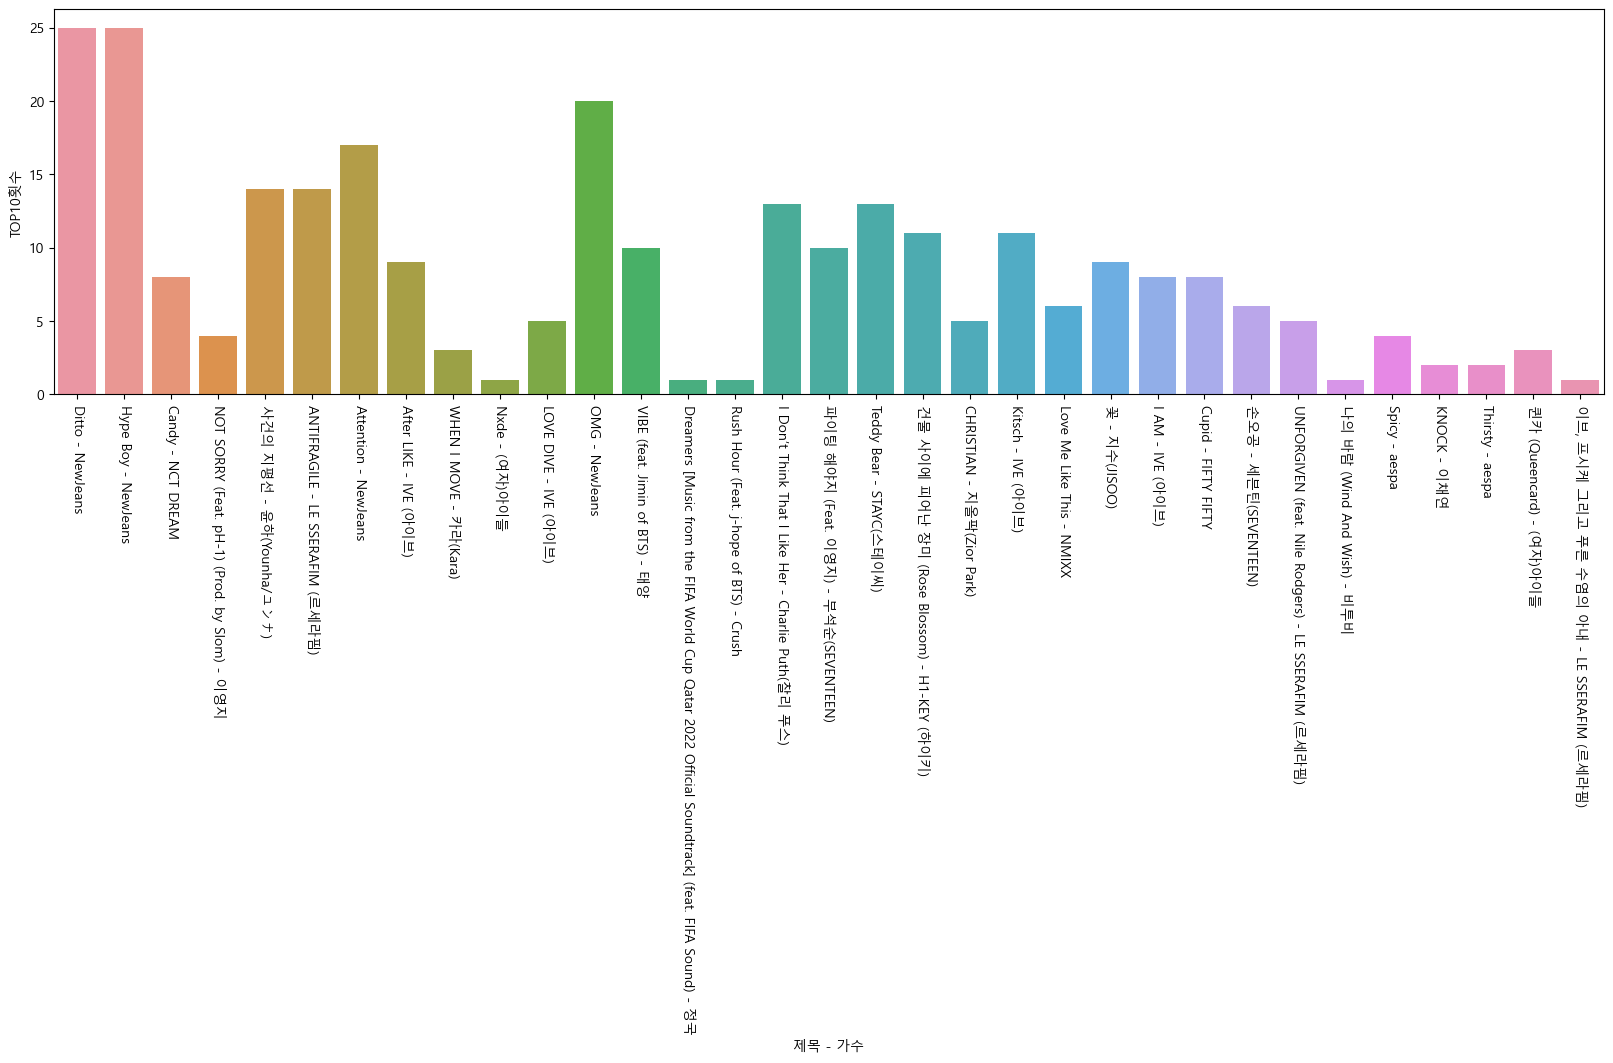

In [2]:
import requests
import lxml.html
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
from matplotlib import font_manager, rc

data=[]
list_data=[]
dicts={'제목 - 가수':'TOP10횟수'}
artist_result, title_result="",""

for month in range(1,6):
    month = str(month).zfill(2)
    for day in range(1,31,7):
        if month=='02' and day==29:
            day=28
        day = str(day).zfill(2)
        month_result = '2023'+str(month)+str(day)
        url="https://music.bugs.co.kr/chart/track/week/total?chartdate="+month_result

        res = requests.get(url)
        res.raise_for_status()

        soup=BeautifulSoup(res.text, "lxml")

        songs = soup.find_all('tr')

        for i, song in enumerate(songs):
            
            #매번 첫번째 오류 제거
            if i == 0:
                continue
            titles = song.find_all('p', attrs={"class":"title"})
            artists = song.find_all('p', attrs={"class":"artist"})
            
            for title in titles:
                title_result = title.find('a').get_text()
            for artist in artists:
                artist_result = artist.find('a').get_text()
                
            result = title_result+' - '+artist_result
            if result in dicts:
                dicts[result] += 1
            else:
                dicts.update({result:1})
            #오류들 제거
            if i == 11:
                break
                
key_list = list(dicts.keys())
for i, j in enumerate(dicts):
    print('{0:<80}\t\t\t{1}회'.format(key_list[i], dicts[j]))
with open("songs.csv", 'w') as file:
    writer = csv.writer(file)
    for i, j in dicts.items():
        writer.writerow([i,j])
df = pd.read_csv("C:/Users/jinho/songs.csv",encoding="cp949")

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,5))
plt.xticks(rotation = -90)
sns.barplot(data=df, x='제목 - 가수', y ='TOP10횟수')

plt.savefig('image.png')